In [39]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

#det0 = serpent.parse_det('../neutronics_paper/reproc/core_det0.m')
det0 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/bol_jeff/tap_spectrum_bol_jeff.serpent_det0.m')
#det10 = serpent.parse_det('load_follow_0-100-0/100-2w-0-4d/tap100_0_100/tap_spectrum.ini_det0.m')
det10 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/eol_jeff/kl_100/tap_spectrum_eol_jeff.serpent_det0.m')

msbr_b = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/msbr/spectrum/bol/msbr_spectrum_det0.m')
msbr_e = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/msbr/spectrum/eol/msbr_spectrum_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/eol_jeff/kl_1/tap_spectrum_eol_jeff.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]

spec_msbr_b = msbr_b['DETavrg']
spec_msbr_e = msbr_e['DETavrg']

# Capture cross section read (Xe135,I135)

In [2]:
file_data_xe = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/xe135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)
file_data_i = np.genfromtxt("/home/andrei2/Desktop/git/ta_xe_equilibrium_test/load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/i135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)

energy_grid_xe = np.array(file_data_xe[:,0])
energy_grid_i = np.array(file_data_i[:,0])
xe_capture_xs = np.array(file_data_xe[:,1])
i_capture_xs =  np.array(file_data_i[:,1])

<IPython.core.display.Javascript object>


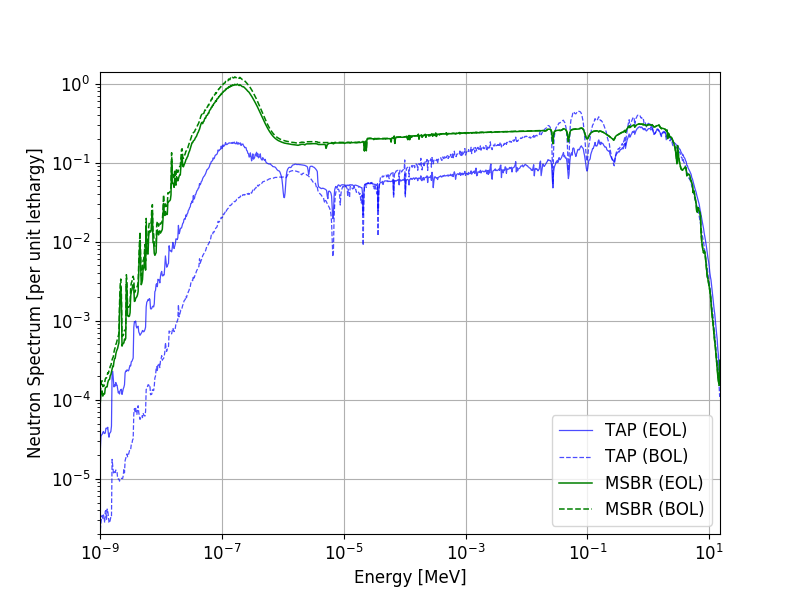

In [42]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]', fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_ylim(2e-6,1.4)
#ax1.set_xlim(1e-11,12)

ax1.loglog(energy, spectrum_grid2[:,10]/np.trapz(spectrum_grid2[:,10],energy), '-', color='b',label='TAP (EOL)', 
           linewidth=0.9, alpha=0.7)
ax1.loglog(energy, spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy), '--', color='b',label='TAP (BOL)', 
           linewidth=0.9, alpha=0.7)

ax1.loglog(energy, spec_msbr_e[:,10]/np.trapz(spec_msbr_e[:,10],energy), '-', color='g', label='MSBR (EOL)', 
           linewidth=1.1)
ax1.loglog(energy, spec_msbr_b[:,10]/np.trapz(spec_msbr_b[:,10],energy), '--', color='g', label='MSBR (BOL)', 
           linewidth=1.1)

ax1.legend(loc=0, fontsize=12)

#ax2=ax1.twinx()
#ax2.loglog(energy_grid_xe, xe_capture_xs, '-',markevery=[100,210],fillstyle='none',color='r',label=r'$^{135}$Xe')
#ax2.loglog(energy_grid_i, i_capture_xs, '--',markevery=[92,125],fillstyle='none',color='r',label=r'$^{135}$I')
#ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=12)
#ax2.tick_params('y', colors='r', labelsize=12)
ax1.set_xlim(1e-9,15)
#ax2.legend(loc=7, fontsize=12)

#ax1.arrow(6e-8, 2.5e-2, -4e-8, 0, head_width=1e-2, head_length=8e-9, fc='b', ec='b')
#ax1.arrow(1e-2, 4.5e-5,  1e-2, 0, width=1e-6, head_width=1.5e-5, head_length=1e-2, fc='r', ec='r')

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch6/msbr_vs_tap_spectrum.png',bbox_inches='tight', dpi=700)

In [41]:
print('Mean error in flux TAP BOL %f%%' %(100*np.mean(spectrum_grid[:,-1])))
print('Mean error in flux TAP EOL %f%%' %(100*np.mean(spectrum_grid2[:,-1])))
print('Mean error in flux MSBR BOL %f%%' %(100*np.mean(spec_msbr_b[:,-1])))
print('Mean error in flux MSBR EOL %f%%' %(100*np.mean(spec_msbr_e[:,-1])))

Mean error in flux TAP BOL 0.918260%
Mean error in flux TAP EOL 0.571945%
Mean error in flux MSBR BOL 0.167190%
Mean error in flux MSBR EOL 0.181460%
